In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 375s 33us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [6]:
single_image= X_train[0]
single_image.shape

(28, 28)

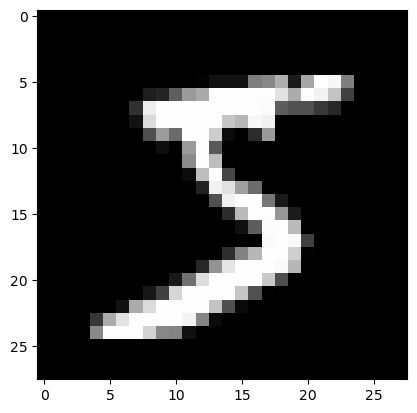

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
#checking the grayscale value range of the images
print(X_train.min())
print(X_train.max())

0
255


In [10]:
#to bring value to 0-1 range
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [11]:
print(X_train_scaled.min())
print(X_train_scaled.max())

0.0
1.0


In [12]:
y_train[0]

5

In [13]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

print(type(y_train_onehot))
y_train_onehot.shape

<class 'numpy.ndarray'>


(60000, 10)

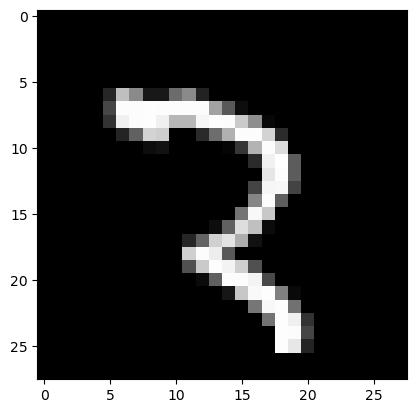

In [14]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [15]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [74]:
#network model
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [75]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [76]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64, 
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 37s 39ms/step - loss: 0.1865 - accuracy: 0.9449 - val_loss: 0.0607 - val_accuracy: 0.9804
Epoch 2/5
938/938 [==============================] - 39s 42ms/step - loss: 0.0594 - accuracy: 0.9819 - val_loss: 0.0544 - val_accuracy: 0.9830
Epoch 3/5
938/938 [==============================] - 39s 42ms/step - loss: 0.0409 - accuracy: 0.9874 - val_loss: 0.0454 - val_accuracy: 0.9843
Epoch 4/5
938/938 [==============================] - 39s 41ms/step - loss: 0.0298 - accuracy: 0.9905 - val_loss: 0.0419 - val_accuracy: 0.9865
Epoch 5/5
938/938 [==============================] - 39s 41ms/step - loss: 0.0244 - accuracy: 0.9926 - val_loss: 0.0398 - val_accuracy: 0.9873


In [77]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.186501,0.944950,0.060655,0.9804
1,0.059425,0.981883,0.054428,0.9830
2,0.040912,0.987383,0.045437,0.9843
3,0.029766,0.990483,0.041934,0.9865
4,0.024398,0.992633,0.039811,0.9873


<AxesSubplot:>

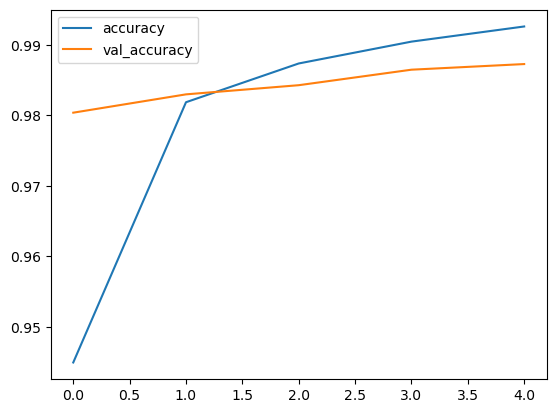

In [78]:
metrics[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

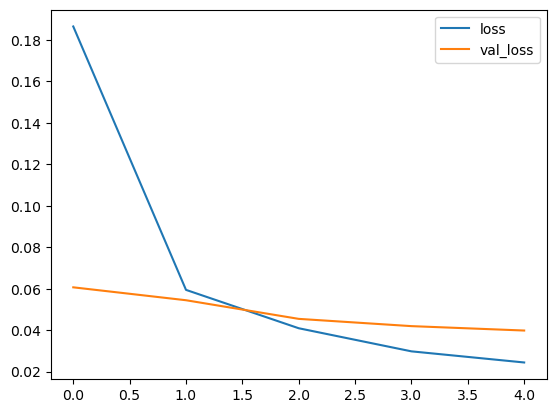

In [79]:
metrics[['loss','val_loss']].plot()

In [80]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)
print(confusion_matrix(y_test,x_test_predictions))

313/313 [==============================] - 2s 5ms/step
[[ 975    0    0    1    0    1    2    0    1    0]
 [   0 1130    1    2    0    0    2    0    0    0]
 [   1    2 1019    1    0    0    0    4    4    1]
 [   0    0    2 1005    0    2    0    1    0    0]
 [   0    1    2    0  971    0    1    0    2    5]
 [   2    1    1    8    0  868   11    0    1    0]
 [   2    1    0    0    2    1  952    0    0    0]
 [   0    3    8    1    0    1    0 1012    2    1]
 [   1    0    4    1    1    0    4    5  952    6]
 [   0    2    2    4    6    2    0    2    2  989]]


In [81]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Prediction for single input

In [82]:
import cv2
inp = cv2.imread('numeg.PNG')
ret,inv =cv2.threshold(inp,86,255,cv2.THRESH_BINARY_INV)
cv2.imwrite('numeg1.PNG',inv)

True

In [83]:
img = image.load_img('numeg.PNG')
type(inv)

numpy.ndarray

In [84]:
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [85]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)
print(x_single_prediction)

1/1 [==============================] - 0s 21ms/step
[2]


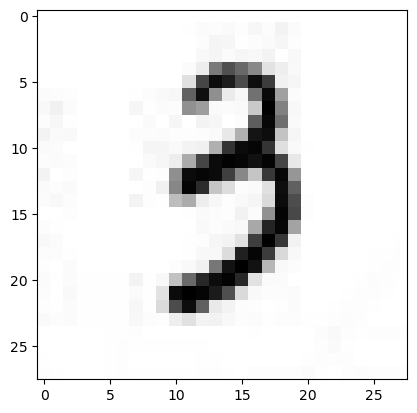

In [86]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [87]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [88]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)
print(x_single_prediction)

1/1 [==============================] - 0s 18ms/step
[3]


In [89]:
img1 = image.load_img('numeg2.PNG')
type(inv)

numpy.ndarray

In [90]:
img1_tensor = tf.convert_to_tensor(np.asarray(img1))
img1_28 = tf.image.resize(img1_tensor,(28,28))
img1_28_gray = tf.image.rgb_to_grayscale(img1_28)
img1_28_gray_scaled = img1_28_gray.numpy()/255.0

In [91]:
x_single_prediction = np.argmax(
    model.predict(img1_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)
print(x_single_prediction)

1/1 [==============================] - 0s 18ms/step
[5]


In [92]:
img1_28_gray_inverted = 255.0-img1_28_gray
img1_28_gray_inverted_scaled = img1_28_gray_inverted.numpy()/255.0

In [93]:
x_single_prediction = np.argmax(
    model.predict(img1_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)
print(x_single_prediction)

1/1 [==============================] - 0s 20ms/step
[5]
